# PlantPal-PFE
## Diagnostique de maladie de plante
Ce projet à pour but de pouvoir diagnostiquer une maladie d'une certaine plante en recevant uniquement une image comme entrée, à l'aide de réseaux de neuronnes convolutifs

Les models utilisés pour le projets seront préentraînés puis fine-tuned avec nos données de plante, afin de maximiser la performance de notre model

Pour le données utilisé dans ce projet, nous avons décidés d'utiliser le dataset `plant_village`(https://www.tensorflow.org/datasets/catalog/plant_village?hl=fr), puisqu'il est suffisamment large pour être pertinent, puis assez documenté pour garantir une utilisation simple 

# Modules et bibliotèques python

### Import de bibliotèques

In [28]:
#General
import os

#Math
import numpy as np  # package for scientific computing with Python.
import matplotlib.pyplot as plt # 2D plotting library
from collections import Counter # dict subclass for counting hashable objects

#AI
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras import utils
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, GlobalAvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image
import cv2

### Definition de fonctions

In [3]:
# Définir les fonctions

#Cette fonction roule jusqua ce quelle trouve une photo d'une classe spécifique puis retourne l'index.
def getRandomPicture(image_class, len_max, data):
    while True:
        idx = np.random.randint(len_max)
        idclass = data[idx]
        if idclass == image_class:
            return idx

# 1 - Analyse des données


## Charger le fichier de données

Statistiques des données

Est-ce que notre ensemble de données est équilibré ?


#### Code

In [2]:
IMG_SIZE = 224  # Size necessary for VGG19
DATADIR = '../../data'  # replace with your actual path

CATEGORIES = [folder for folder in os.listdir(DATADIR)] 
print(CATEGORIES)

dataset = []
X = []
Y = []

for category in CATEGORIES:
    print("Analysing " + category + "...")
    category_path = os.path.join(DATADIR, category)  # path to disease or healthy dir
    class_num = CATEGORIES.index(category)  # get the classification  (0 to 9)
    for plant_folder in os.listdir(category_path):
        plant_path = os.path.join(category_path, plant_folder)
        for img in os.listdir(plant_path):
            try:
                img_array = cv2.imread(os.path.join(plant_path, img))  # read the image
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
                dataset.append([img_resized, class_num])  # add it to the dataset. Not adding it to X and Y yet because we need to shuffle the dataset
            except Exception as e:
                print(e)
                pass

#dataset = np.array(dataset)  # convert the dataset to a numpy array
np.random.shuffle(dataset)

# Split into features (X) and labels (Y)
for features, label in dataset:
    X.append(features)
    Y.append(label)

X = np.array(X)
Y = np.array(Y)

# Normalize X
X = X / 255.0

# Split into train, valid and test, with a ratio of 70-15-15. Can be adapted later.
print("Splitting data...")
X_train = X[:int(len(X)*.7)]
Y_train = Y[:int(len(X)*.7)]
X_temp = X[int(len(X)*.7):]
Y_temp = Y[int(len(X)*.7):]

X_val = X_temp[:int(len(X_temp)*.5)]
Y_val = Y_temp[:int(len(X_temp)*.5)]
X_test = X_temp[int(len(X_temp)*.5):]
Y_test = Y_temp[int(len(X_temp)*.5):]

# Print the shapes
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))
print("X_val shape: " + str(X_val.shape))

['Late_blight', 'Powdery_mildew', 'Healthy', 'Early_blight', 'Target_Spot', 'Spider_mites', 'Mosaic_virus', 'Rust', 'Leaf_Mold', 'Bacterial_spot']
Analysing Late_blight...
Analysing Powdery_mildew...
Analysing Healthy...
Analysing Early_blight...
Analysing Target_Spot...
Analysing Spider_mites...
Analysing Mosaic_virus...
Analysing Rust...
Analysing Leaf_Mold...
Analysing Bacterial_spot...


# 2 - Préparation des données

#### Description

#### Code

In [4]:

print("splitting dataset...")
# Split into training, validation and testing sets with a 60-20-20 split

print("split train & temp. splitting temp into test and validation...")
X_val = X_temp[:int(len(X_temp)*.5)]
Y_val = Y_temp[:int(len(X_temp)*.5)]
X_test = X_temp[int(len(X_temp)*.5):]
Y_test = Y_temp[int(len(X_temp)*.5):]

#X_temp, X_train, Y_temp, Y_train = train_test_split(X, Y, test_size=0.7, random_state=42) # Split into temp and test

#X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42) # Split temp into train and validation



print("Y_train shape: " + str(Y_train.shape))
print("Y_test shape: " + str(Y_test.shape))
print("Y_val shape: " + str(Y_val.shape))

splitting dataset...
split train & temp. splitting temp into test and validation...
X_train shape: (11988, 224, 224, 3)
X_test shape: (2569, 224, 224, 3)
X_val shape: (2569, 224, 224, 3)
Y_train shape: (11988,)
Y_test shape: (2569,)
Y_val shape: (2569,)


### Pré-traitement des images


#### Code

[3 8 2 ... 0 5 5]


## Visualisation Data

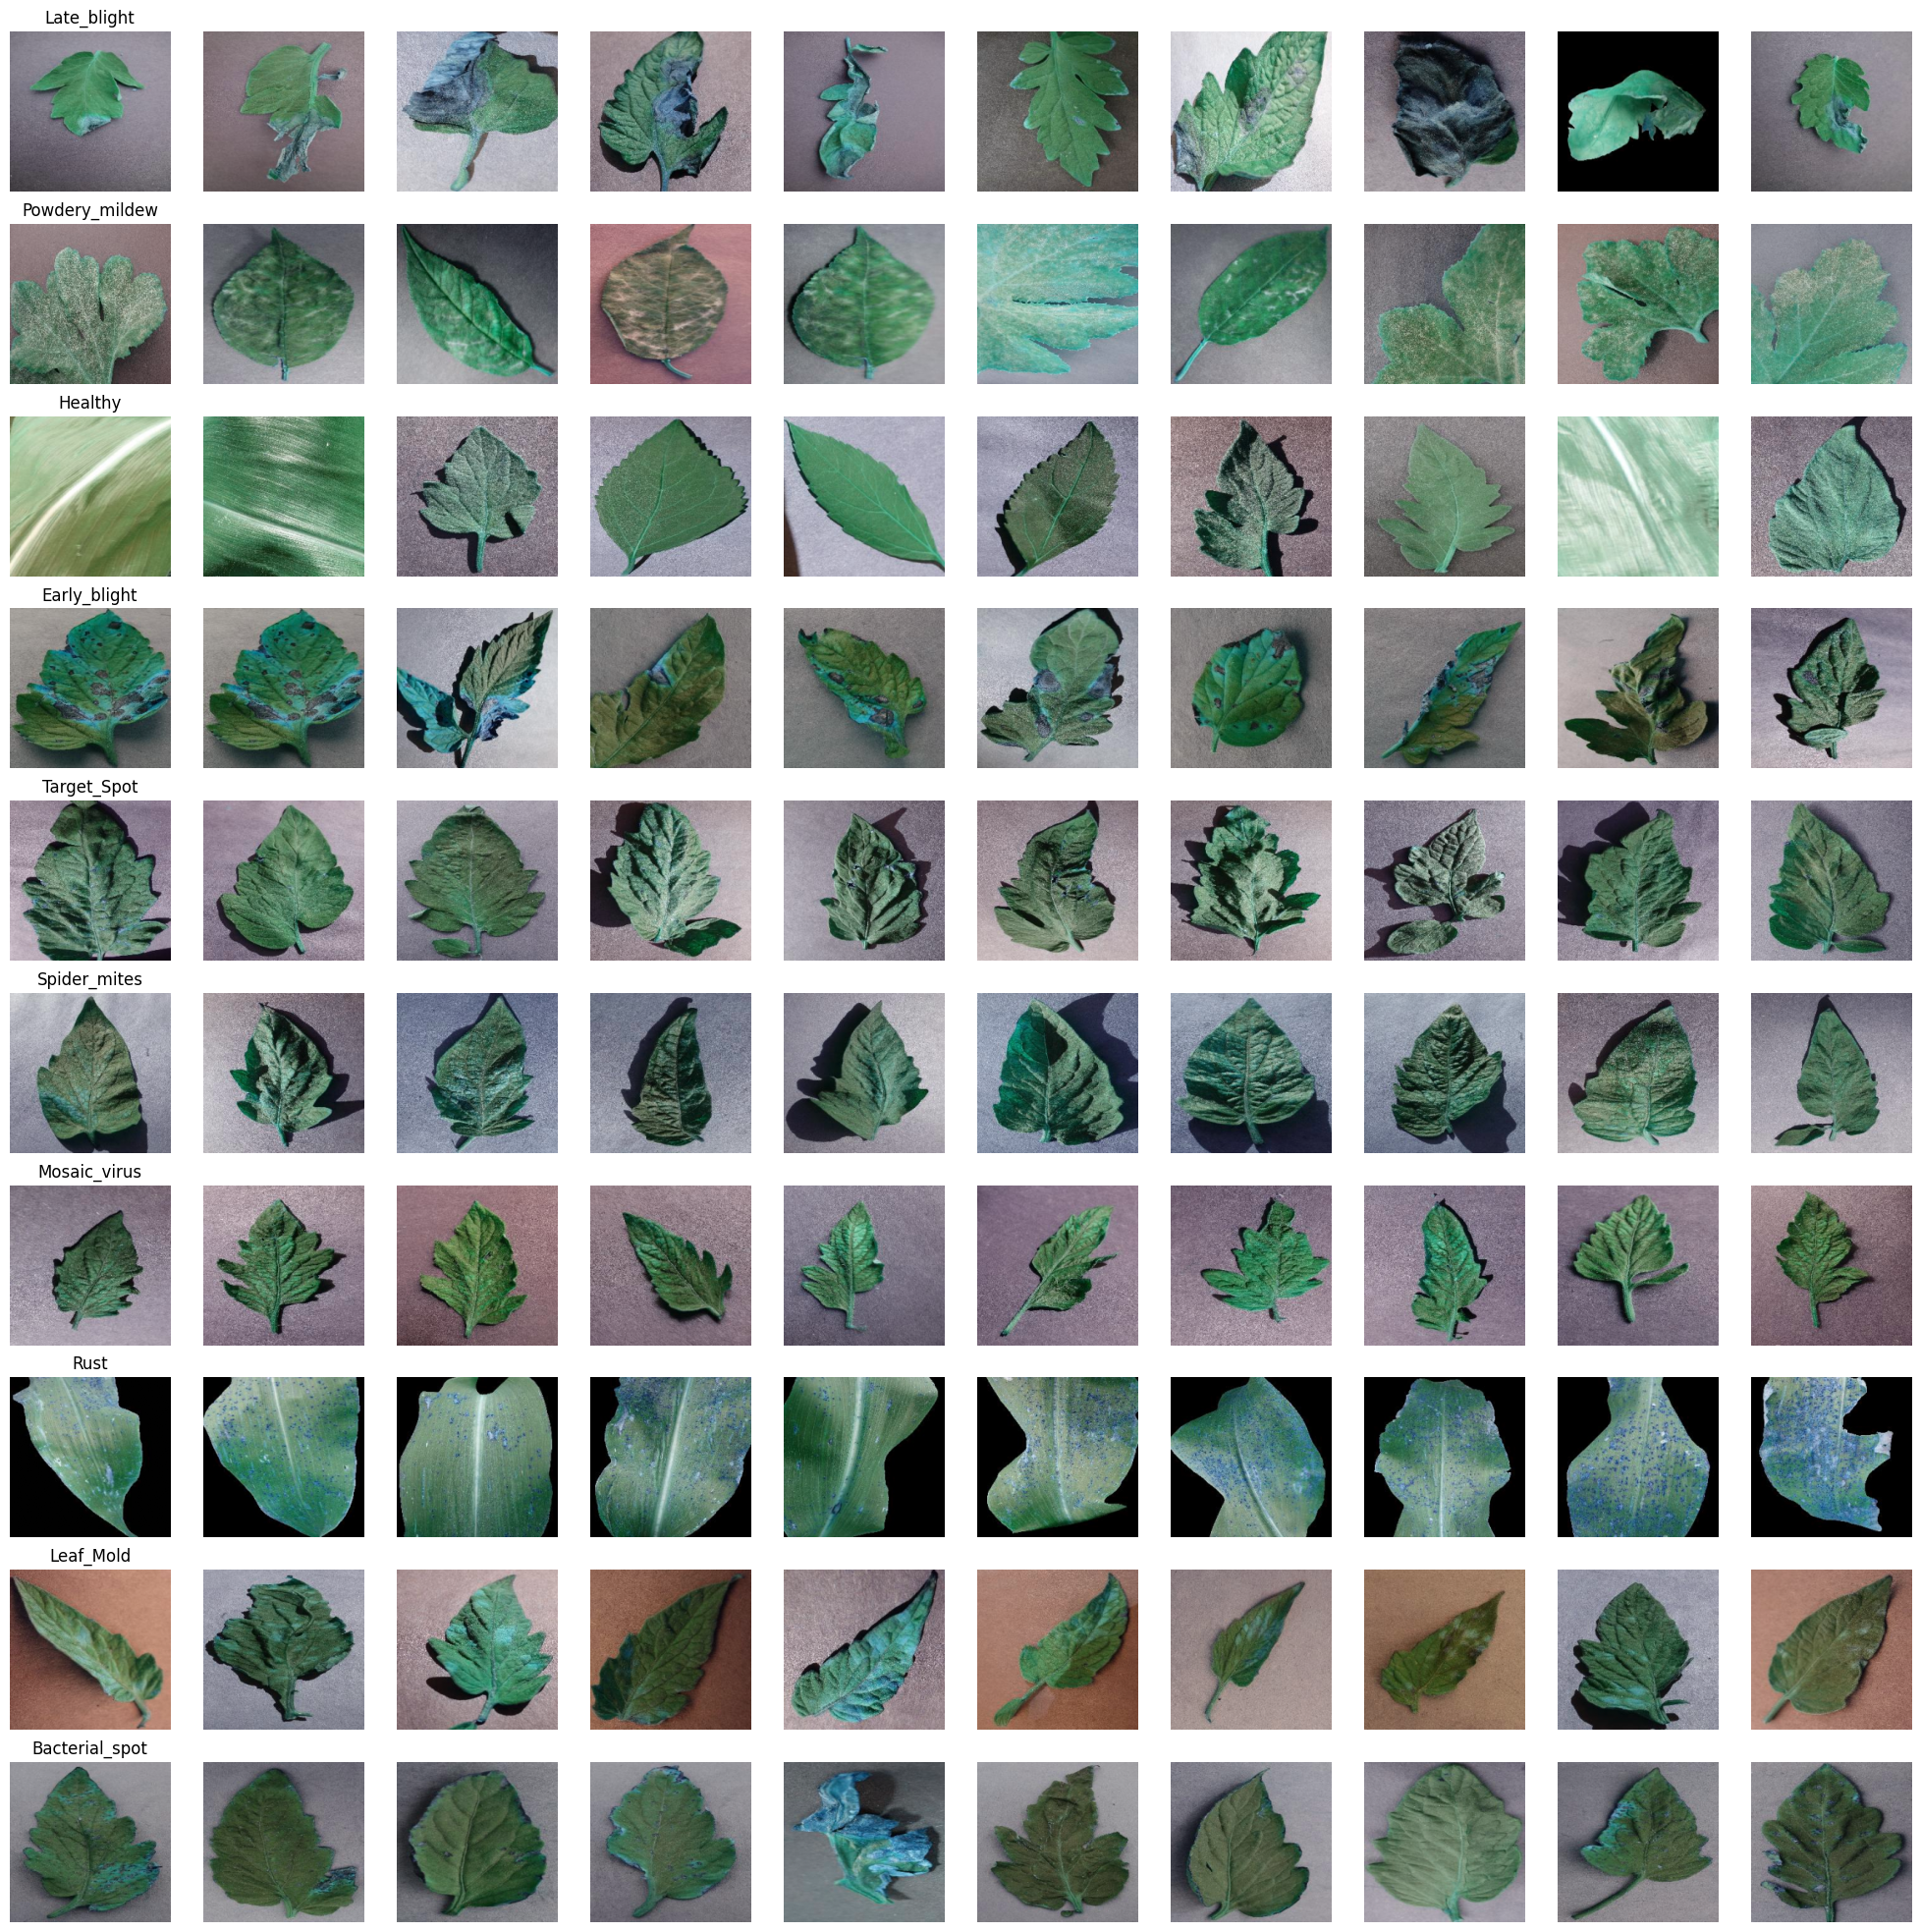

In [6]:
# Définir les dimensions de la grille
rows = 10
cols = 10

labels = CATEGORIES
# Créer des figures vides pour le tableau
fig, axs = plt.subplots(rows, cols, figsize=(25, 25))

# Boucle sur les lignes de la grille
for i in range(rows):
    # Boucle sur les colonnes de la grille
    for j in range(cols):
        #Fonction définie plus haut pour aller chercher une image random d'une certaine emotion
        idx = getRandomPicture(i, X_train.shape[0], Y_train)
        
        # Choisir un indice aléatoire pour un échantillon
        # Afficher l'image à l'emplacement courant de la grille
        axs[i, j].imshow(X_train[idx])
        axs[i, j].axis('off')
        
    #Afficher le titre de chaque emotions
    axs[i, 0].set_title(labels[i])

# Distribution du data


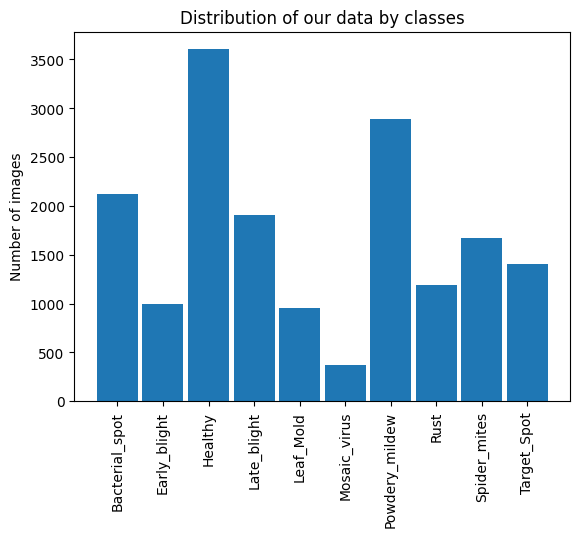

In [44]:
labels = CATEGORIES
counter = Counter(Y)

# Sort by class label
sorted_items = sorted(counter.items())

# Separate labels and counts
labels, counts = zip(*sorted_items)

# Create bar chart
plt.bar(labels, counts, tick_label=CATEGORIES, align='center',width=0.9)

plt.ylabel("Number of images")
plt.xticks(rotation='vertical')
plt.title("Distribution of our data by classes")
plt.show()


## Create Model

Currently fine-tuning a simple VGG19 model to get initial results

In [29]:
# One-hot encode the labels
ytrain = utils.to_categorical(Y_train)
yval   = utils.to_categorical(Y_val)
ytest  = utils.to_categorical(Y_test)

inp = Input(shape = X_train[0].shape, name="input")

img_pre = preprocess_input(inp)

vgg_model = VGG19(weights="imagenet", include_top=False, input_shape=(224,224,3))

#Only set the last 6 layers to be trainable.
for layer in vgg_model.layers[:-2]:
    layer.trainable = False

for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.output_shape, "trainable : ", layer.trainable)

flat = GlobalAveragePooling2D(name="GAV")(vgg_model(img_pre))
dense1 = Dense(64, activation="relu")(flat)
drop1 = Dropout(0.5)(dense1)

# Output layer
dense2 = Dense(10, activation="softmax", name="output")(drop1)
model = Model(inp, dense2)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

0 input_17 [(None, 224, 224, 3)] trainable :  False
1 block1_conv1 (None, 224, 224, 64) trainable :  False
2 block1_conv2 (None, 224, 224, 64) trainable :  False
3 block1_pool (None, 112, 112, 64) trainable :  False
4 block2_conv1 (None, 112, 112, 128) trainable :  False
5 block2_conv2 (None, 112, 112, 128) trainable :  False
6 block2_pool (None, 56, 56, 128) trainable :  False
7 block3_conv1 (None, 56, 56, 256) trainable :  False
8 block3_conv2 (None, 56, 56, 256) trainable :  False
9 block3_conv3 (None, 56, 56, 256) trainable :  False
10 block3_conv4 (None, 56, 56, 256) trainable :  False
11 block3_pool (None, 28, 28, 256) trainable :  False
12 block4_conv1 (None, 28, 28, 512) trainable :  False
13 block4_conv2 (None, 28, 28, 512) trainable :  False
14 block4_conv3 (None, 28, 28, 512) trainable :  False
15 block4_conv4 (None, 28, 28, 512) trainable :  False
16 block4_pool (None, 14, 14, 512) trainable :  True
17 block5_conv1 (None, 14, 14, 512) trainable :  True
18 block5_conv2 (None

## Train the model

In [31]:
nb_epochs = 10
batch_size = 32

#Using ImageDataGenerator to augment the data
train_gen = ImageDataGenerator(rotation_range=40,shear_range=0.15, width_shift_range=0.15, height_shift_range=0.15)
train_generator = train_gen.flow(X_train, ytrain, batch_size=batch_size)

model_data = model.fit(train_generator, validation_data=(X_val, yval), epochs=nb_epochs, batch_size=batch_size, verbose=1, shuffle=True)

# Plot the training and validation loss + accuracy
fix, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(np.arange(0, nb_epochs), model_data.history["loss"], label="train_loss")
axes[0].plot(np.arange(0, nb_epochs), model_data.history["val_loss"], label="val_loss")
axes[0].set_title("Loss")
axes[0].set_xlabel("Epoch #")
axes[0].set_ylabel("Loss")
axes[0].legend(["Train", "Validation"],loc="upper left")

axes[1].plot(np.arange(0, nb_epochs), model_data.history["accuracy"], label="train_acc")
axes[1].plot(np.arange(0, nb_epochs), model_data.history["val_accuracy"], label="val_acc")
axes[1].set_title("Accuracy")
axes[1].set_xlabel("Epoch #")
axes[1].set_ylabel("Accuracy")
axes[1].legend(["Train", "Validation"], loc="upper left")
plt.show()

Epoch 1/10
  5/375 [..............................] - ETA: 1:09:33 - loss: 4.9912 - accuracy: 0.0938